In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_crab = pd.read_csv('./Downloads/train.csv')

In [47]:
print(df_crab.head())

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8  


In [48]:
df_crab.shape

(74051, 10)

In [49]:
df_X=df_crab

In [50]:
X=df_X.drop(['Age'],axis=1)
print(X.head())

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  
0        6.647958      8.348928  
1        2.324659      3.401940  
2        5.556502      6.662133  
3       10.991839     14.996885  
4        4.507570      5.953395  


In [51]:
X=X.drop(['id','Sex'],axis=1)

In [52]:
print(X.head())

   Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  
0      8.348928  
1      3.401940  
2      6.662133  
3     14.996885  
4      5.953395  


In [53]:
y=df_crab['Age']
print(y.head())

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [57]:
X_train=scaler.fit_transform(X_train)

In [58]:
X_test=scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [60]:
regression=LinearRegression()

In [82]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse=cross_val_score(regression,X_train,y_train,scoring=mse_scorer,cv=5)

In [83]:

np.mean(mse)

-4.65645748143018

In [84]:
regression.fit(X_train, y_train)
reg_pred=regression.predict(X_test)

In [85]:
reg_pred

array([13.45016687,  5.7155641 ,  9.68617523, ..., 10.52844485,
       12.77446458, 12.50348792])

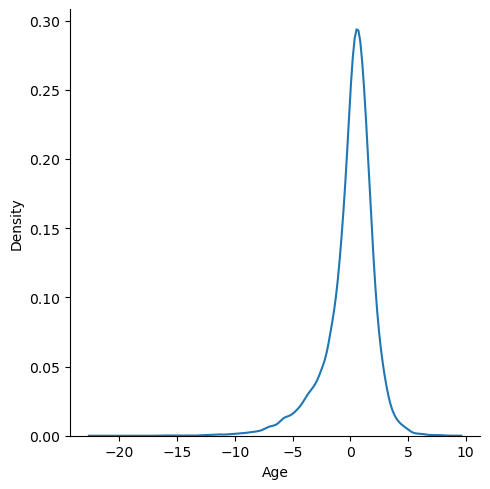

In [74]:

sns.displot(reg_pred-y_test,kind='kde')    



In [86]:
from sklearn.metrics import r2_score

In [87]:
score=r2_score(reg_pred,y_test)

In [88]:
score

0.1610984338561403